# USD/JPY

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\harsh\Desktop\Predictions\USD_JPY - Sheet1.csv")

In [3]:
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,05/03/2019,111.89,111.72,112.12,111.70,89.29K,0.13%
1,04/03/2019,111.75,111.77,112.02,111.64,88.45K,-0.15%
2,01/03/2019,111.92,111.39,112.08,111.33,100.05K,0.48%
3,28/02/2019,111.39,111.00,111.50,110.66,95.99K,0.35%
4,27/02/2019,111.00,110.58,111.08,110.36,90.57K,0.38%


In [4]:
data.Date = pd.to_datetime(data.Date, dayfirst = True)

In [5]:
data.set_index("Date" , inplace = True)

In [6]:
data.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2019-03-05,111.89,111.72,112.12,111.70,89.29K,0.13%
2019-03-04,111.75,111.77,112.02,111.64,88.45K,-0.15%
2019-03-01,111.92,111.39,112.08,111.33,100.05K,0.48%
2019-02-28,111.39,111.00,111.50,110.66,95.99K,0.35%
2019-02-27,111.00,110.58,111.08,110.36,90.57K,0.38%


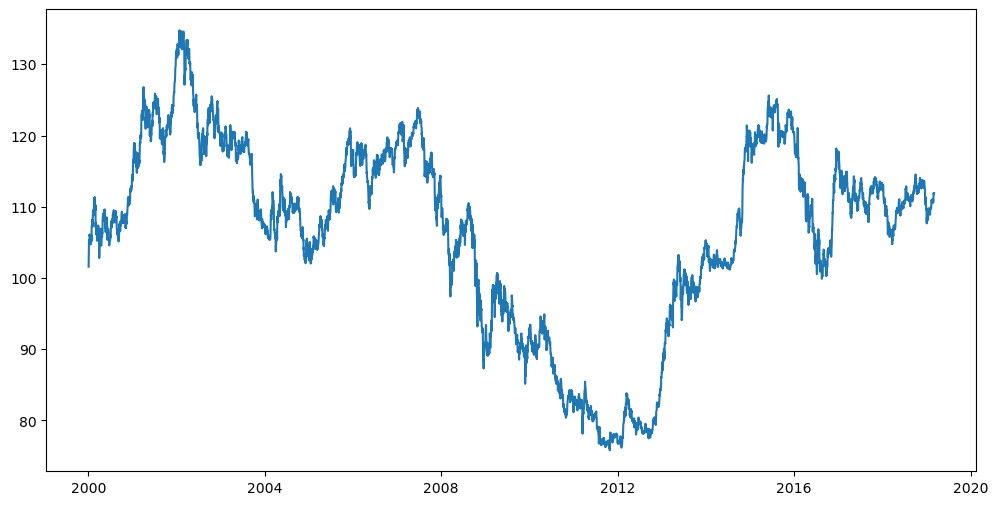

In [7]:
plt.figure(figsize = (12,6))
plt.plot(data.Price)

In [8]:
data1 = data.reset_index()

In [9]:
data1.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2019-03-05,111.89,111.72,112.12,111.70,89.29K,0.13%
1,2019-03-04,111.75,111.77,112.02,111.64,88.45K,-0.15%
2,2019-03-01,111.92,111.39,112.08,111.33,100.05K,0.48%
3,2019-02-28,111.39,111.00,111.50,110.66,95.99K,0.35%
4,2019-02-27,111.00,110.58,111.08,110.36,90.57K,0.38%


In [10]:
data1.drop(['Date','Volume','Chg%'],axis = 1)

,Price,Open,High,Low
0,111.89,111.72,112.12,111.70
1,111.75,111.77,112.02,111.64
2,111.92,111.39,112.08,111.33
3,111.39,111.00,111.50,110.66
4,111.00,110.58,111.08,110.36
...,...,...,...,...
4995,105.36,105.27,105.91,104.85
4996,105.33,104.32,105.55,103.97
4997,104.29,103.28,104.40,102.76
4998,103.27,101.46,103.28,101.40


In [11]:
df = data1.Price.rolling(100).mean()

In [12]:
df1 = data1.Price.rolling(200).mean()

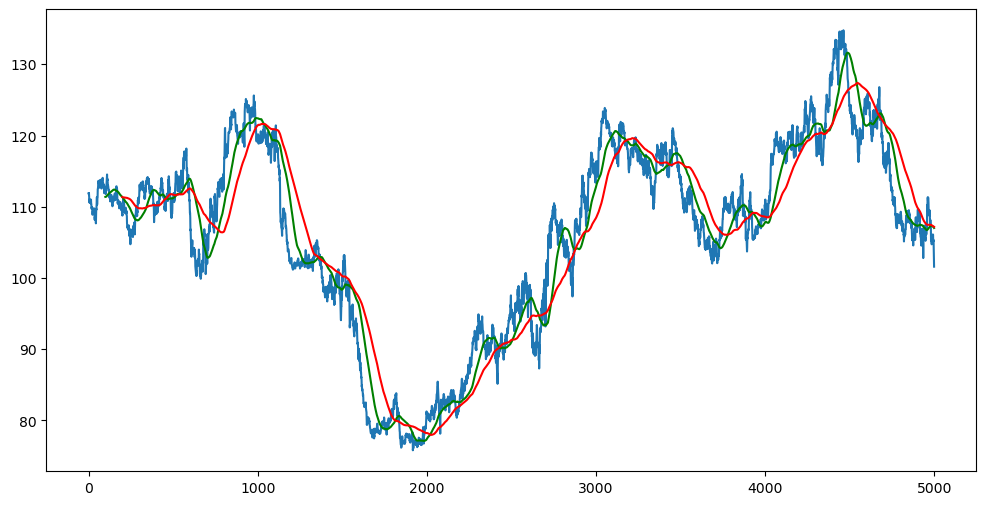

In [13]:
plt.figure(figsize = (12,6))
plt.plot(data1.Price)
plt.plot(df, 'g')
plt.plot(df1, 'r')

In [14]:
data.shape

(5000, 6)

In [15]:
data2 = data.drop(['Open','Volume','High','Low','Chg%'],axis = 1)

In [16]:
data2.head()

,Price
Date,
2019-03-05,111.89
2019-03-04,111.75
2019-03-01,111.92
2019-02-28,111.39
2019-02-27,111.00


In [17]:
split = int(len(data2)*0.8)

In [18]:
train_data = pd.DataFrame(data2['Price'][0:split])
test_data = pd.DataFrame(data2['Price'][split:])

In [19]:
train_data.shape

(4000, 1)

In [20]:
test_data.shape

(1000, 1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
train_data_array = scaler.fit_transform(train_data)

In [23]:
train_data_array.shape

(4000, 1)

In [24]:
test_data_array = scaler.fit_transform(test_data)

In [25]:
x_train = []
y_train = []
for i in range(100,train_data_array.shape[0]):
    x_train.append(train_data_array[i-100 : i])
    y_train.append(train_data_array[i , 0])
   

In [26]:
x_train = np.array(x_train)

In [27]:
y_train = np.array(y_train)

In [28]:
from keras.layers.core import Dense
from keras.layers import Dropout, LSTM
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu',return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,return_sequences = True, activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(units = 80,return_sequences = True, activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [31]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
122/122 [==============================] - 31s 196ms/step - loss: 0.0419
Epoch 2/10
122/122 [==============================] - 23s 190ms/step - loss: 0.0116
Epoch 3/10
122/122 [==============================] - 21s 171ms/step - loss: 0.0100
Epoch 4/10
122/122 [==============================] - 21s 170ms/step - loss: 0.0078
Epoch 5/10
122/122 [==============================] - 21s 169ms/step - loss: 0.0077
Epoch 6/10
122/122 [==============================] - 22s 179ms/step - loss: 0.0066
Epoch 7/10
122/122 [==============================] - 17s 136ms/step - loss: 0.0066
Epoch 8/10
122/122 [==============================] - 16s 132ms/step - loss: 0.0060
Epoch 9/10
122/122 [==============================] - 16s 134ms/step - loss: 0.0059
Epoch 10/10
122/122 [==============================] - 17s 136ms/step - loss: 0.0055


In [32]:
model.save('keras_modelSilver.h5')

In [33]:
test_data.head()

,Price
Date,
2003-11-04,109.54
2003-11-03,111.01
2003-10-31,109.92
2003-10-30,108.76
2003-10-29,108.34


In [34]:
past_100_days = train_data.tail(100)

In [35]:
final_df = past_100_days.append(test_data, ignore_index = True)

In [36]:
final_df.head()

,Price
0,106.78
1,106.85
2,106.75
3,106.74
4,108.23


In [37]:
input_data = scaler.fit_transform(final_df)

In [38]:
input_data.shape

(1100, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [40]:
x_test, y_test = np.array(x_test),np.array(y_test)

In [41]:
y_pred = model.predict(x_test)

32/32 [==============================] - 2s 36ms/step


In [42]:
scaler.scale_

array([0.03013864])

In [43]:
scale_factor = 1/0.03013864

In [44]:
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

Text(0, 0.5, 'Price')

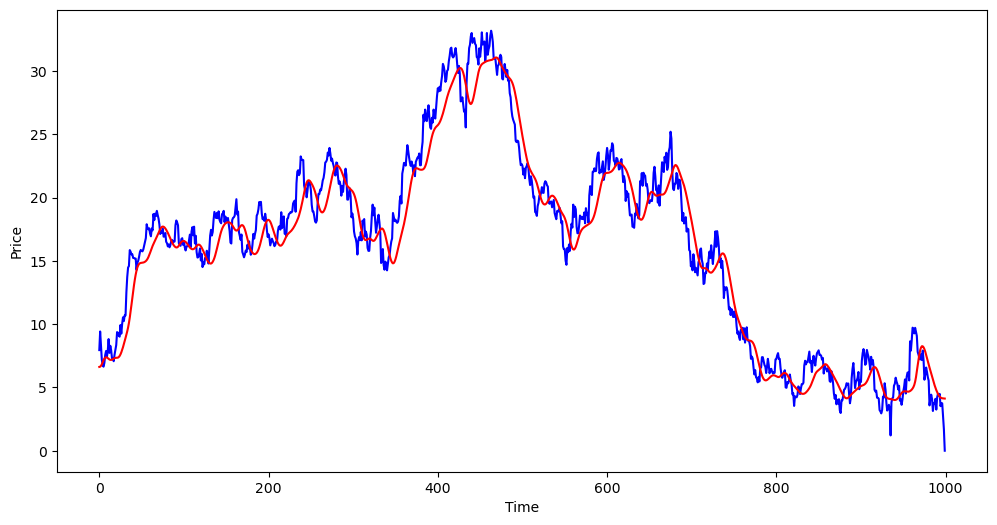

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original')
plt.plot(y_pred, 'r', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Price')

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

1.8421774889178664
